In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [2]:
# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)
mobility.set_index('date', inplace=True)

In [3]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

new_weather.set_index('date', inplace=True)

In [4]:
data = pd.concat([case, new_weather, mobility], axis=1)
data.head()

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-18,38,86.0,27.6,29.0,25.800000,-22,-3,-28,-32,-19,11
2020-03-19,50,83.0,28.1,31.4,25.800000,-28,-12,-33,-38,-21,12
2020-03-20,14,82.0,27.4,31.2,25.200000,-30,-11,-32,-42,-23,15
2020-03-21,44,81.0,28.1,32.4,26.521978,-35,-5,-38,-40,-10,11
2020-03-22,36,84.0,27.2,31.2,25.000000,-49,-22,-59,-49,-12,14


In [5]:
data.shape

(423, 11)

In [6]:
train = data[:413]
test = data[413:]

In [7]:
X = train[['rh', 'avt', 'mxt', 'mnt', 'retail_recreation', 'grocery_pahrmacy', 'parks', 'transit_station', 'workplace', 'residential']]
y = train['case']

In [8]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [9]:
print(regr.coef_) #--> Slope
print(regr.intercept_) #--> Intercept

[ -23.9819819   -18.22729717 -234.05110675  -85.77375412   -5.4345072
  -40.70079319    4.00042535   32.67161957  -37.96043817 -109.52240831]
14421.275208294426


In [10]:
case_true = test['case']
del test['case']

In [11]:
case_predict = regr.predict(test)

print(case_predict)

[1056.13577192  879.48812128  462.18486324  609.53882598  405.13295228
  410.90244321  288.42687046  233.36199158 2166.97820197 1571.41557929]


In [12]:
list_hasil = case_predict.tolist()
list_eval = case_true.tolist()

In [13]:
rmse = mean_squared_error(list_eval, list_hasil, squared=False)
rmse

582.3412048308214

In [14]:
mse = mean_squared_error(list_eval, list_hasil)
mse

339121.27884381276

In [15]:
mae = mean_absolute_error(list_eval, list_hasil)
mae

422.84934851540527

<AxesSubplot:>

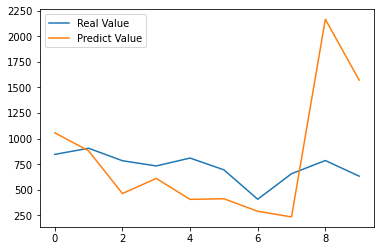

In [16]:
compare = pd.DataFrame(list(zip(list_eval, list_hasil)), columns =['Real Value', 'Predict Value'])
compare.plot()